In [3]:
from google.colab import drive
drive.mount('/gdrive')
%cd /gdrive

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).
/gdrive


In [2]:
# Importing Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix
from xgboost import XGBClassifier
from keras.models import Sequential
from keras.layers import Dense, Dropout
import warnings
warnings.filterwarnings("ignore")

In [4]:
df = pd.read_csv('/gdrive/MyDrive/healthcare-dataset-stroke-data.csv')

In [5]:
print("First 10 rows of the dataset:\n", df.head(10))

First 10 rows of the dataset:
       id  gender   age  hypertension  heart_disease ever_married  \
0   9046    Male  67.0             0              1          Yes   
1  51676  Female  61.0             0              0          Yes   
2  31112    Male  80.0             0              1          Yes   
3  60182  Female  49.0             0              0          Yes   
4   1665  Female  79.0             1              0          Yes   
5  56669    Male  81.0             0              0          Yes   
6  53882    Male  74.0             1              1          Yes   
7  10434  Female  69.0             0              0           No   
8  27419  Female  59.0             0              0          Yes   
9  60491  Female  78.0             0              0          Yes   

       work_type Residence_type  avg_glucose_level   bmi   smoking_status  \
0        Private          Urban             228.69  36.6  formerly smoked   
1  Self-employed          Rural             202.21   NaN     never

In [6]:
print("\nLast 10 rows of the dataset:\n", df.tail(10))


Last 10 rows of the dataset:
          id  gender   age  hypertension  heart_disease ever_married  \
5100  68398    Male  82.0             1              0          Yes   
5101  36901  Female  45.0             0              0          Yes   
5102  45010  Female  57.0             0              0          Yes   
5103  22127  Female  18.0             0              0           No   
5104  14180  Female  13.0             0              0           No   
5105  18234  Female  80.0             1              0          Yes   
5106  44873  Female  81.0             0              0          Yes   
5107  19723  Female  35.0             0              0          Yes   
5108  37544    Male  51.0             0              0          Yes   
5109  44679  Female  44.0             0              0          Yes   

          work_type Residence_type  avg_glucose_level   bmi   smoking_status  \
5100  Self-employed          Rural              71.97  28.3     never smoked   
5101        Private        

In [8]:
print("\nDataset Summary:")
print(df.describe())


Dataset Summary:
                 id          age  hypertension  heart_disease  \
count   5110.000000  5110.000000   5110.000000    5110.000000   
mean   36517.829354    43.226614      0.097456       0.054012   
std    21161.721625    22.612647      0.296607       0.226063   
min       67.000000     0.080000      0.000000       0.000000   
25%    17741.250000    25.000000      0.000000       0.000000   
50%    36932.000000    45.000000      0.000000       0.000000   
75%    54682.000000    61.000000      0.000000       0.000000   
max    72940.000000    82.000000      1.000000       1.000000   

       avg_glucose_level          bmi       stroke  
count        5110.000000  4909.000000  5110.000000  
mean          106.147677    28.893237     0.048728  
std            45.283560     7.854067     0.215320  
min            55.120000    10.300000     0.000000  
25%            77.245000    23.500000     0.000000  
50%            91.885000    28.100000     0.000000  
75%           114.090000 

In [9]:
print("\nMissing Values in Each Column:\n", df.isnull().sum())


Missing Values in Each Column:
 id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64


In [10]:
print(f"\nDataset contains {df.shape[0]} rows and {df.shape[1]} columns.")


Dataset contains 5110 rows and 12 columns.


In [11]:
print("\nData Types of Each Column:\n", df.dtypes)


Data Types of Each Column:
 id                     int64
gender                object
age                  float64
hypertension           int64
heart_disease          int64
ever_married          object
work_type             object
Residence_type        object
avg_glucose_level    float64
bmi                  float64
smoking_status        object
stroke                 int64
dtype: object


In [12]:
df.dropna(inplace=True)

In [13]:
if 'id' in df.columns:
    df.drop(['id'], axis=1, inplace=True)

In [14]:
le = LabelEncoder()
categorical_columns = ['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']
for col in categorical_columns:
    df[col] = le.fit_transform(df[col])

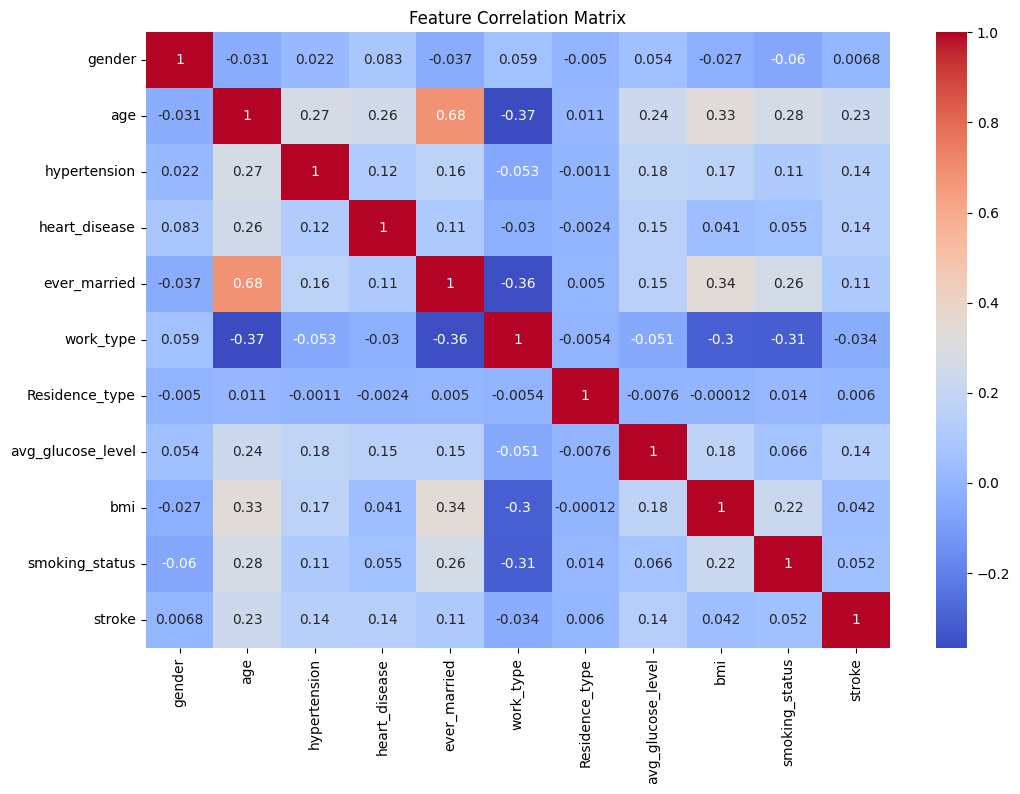

In [15]:
plt.figure(figsize=(12,8))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Feature Correlation Matrix')
plt.show()

In [16]:
X = df.drop('stroke', axis=1)
y = df['stroke']

In [17]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

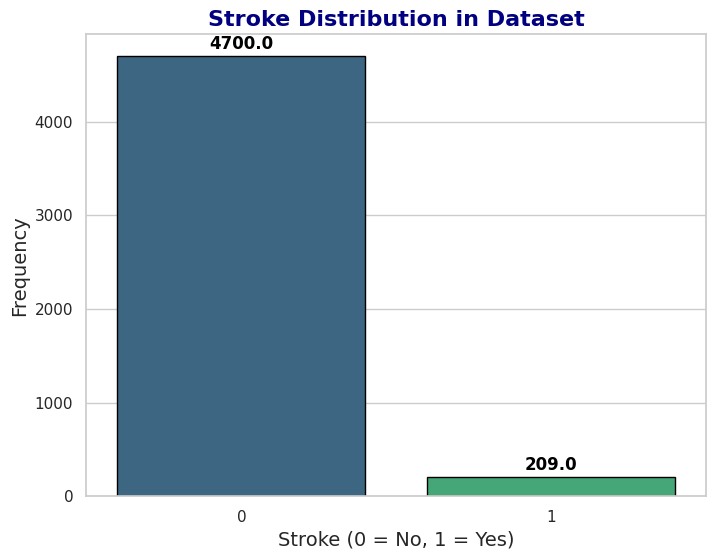

In [33]:
# Enhanced Stroke Distribution Count Plot with Customizations
plt.figure(figsize=(8, 6))
sns.set(style="whitegrid")

# Customized countplot with a specific color palette and edge colors
ax = sns.countplot(
    x=df['stroke'],
    palette="viridis",
    edgecolor="black",
    order=df['stroke'].value_counts().index
)

# Adding a title with a larger font and additional details
plt.title('Stroke Distribution in Dataset', fontsize=16, fontweight='bold', color='navy')

# Adding labels for clarity
plt.xlabel('Stroke (0 = No, 1 = Yes)', fontsize=14)
plt.ylabel('Frequency', fontsize=14)

# Adding data labels to the bars
for p in ax.patches:
    ax.annotate(f'{p.get_height()}',
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center',
                va='baseline',
                fontsize=12,
                color='black',
                fontweight='bold',
                xytext=(0, 5),
                textcoords='offset points')

# Display the plot
plt.show()

In [34]:
model_accuracies = {}

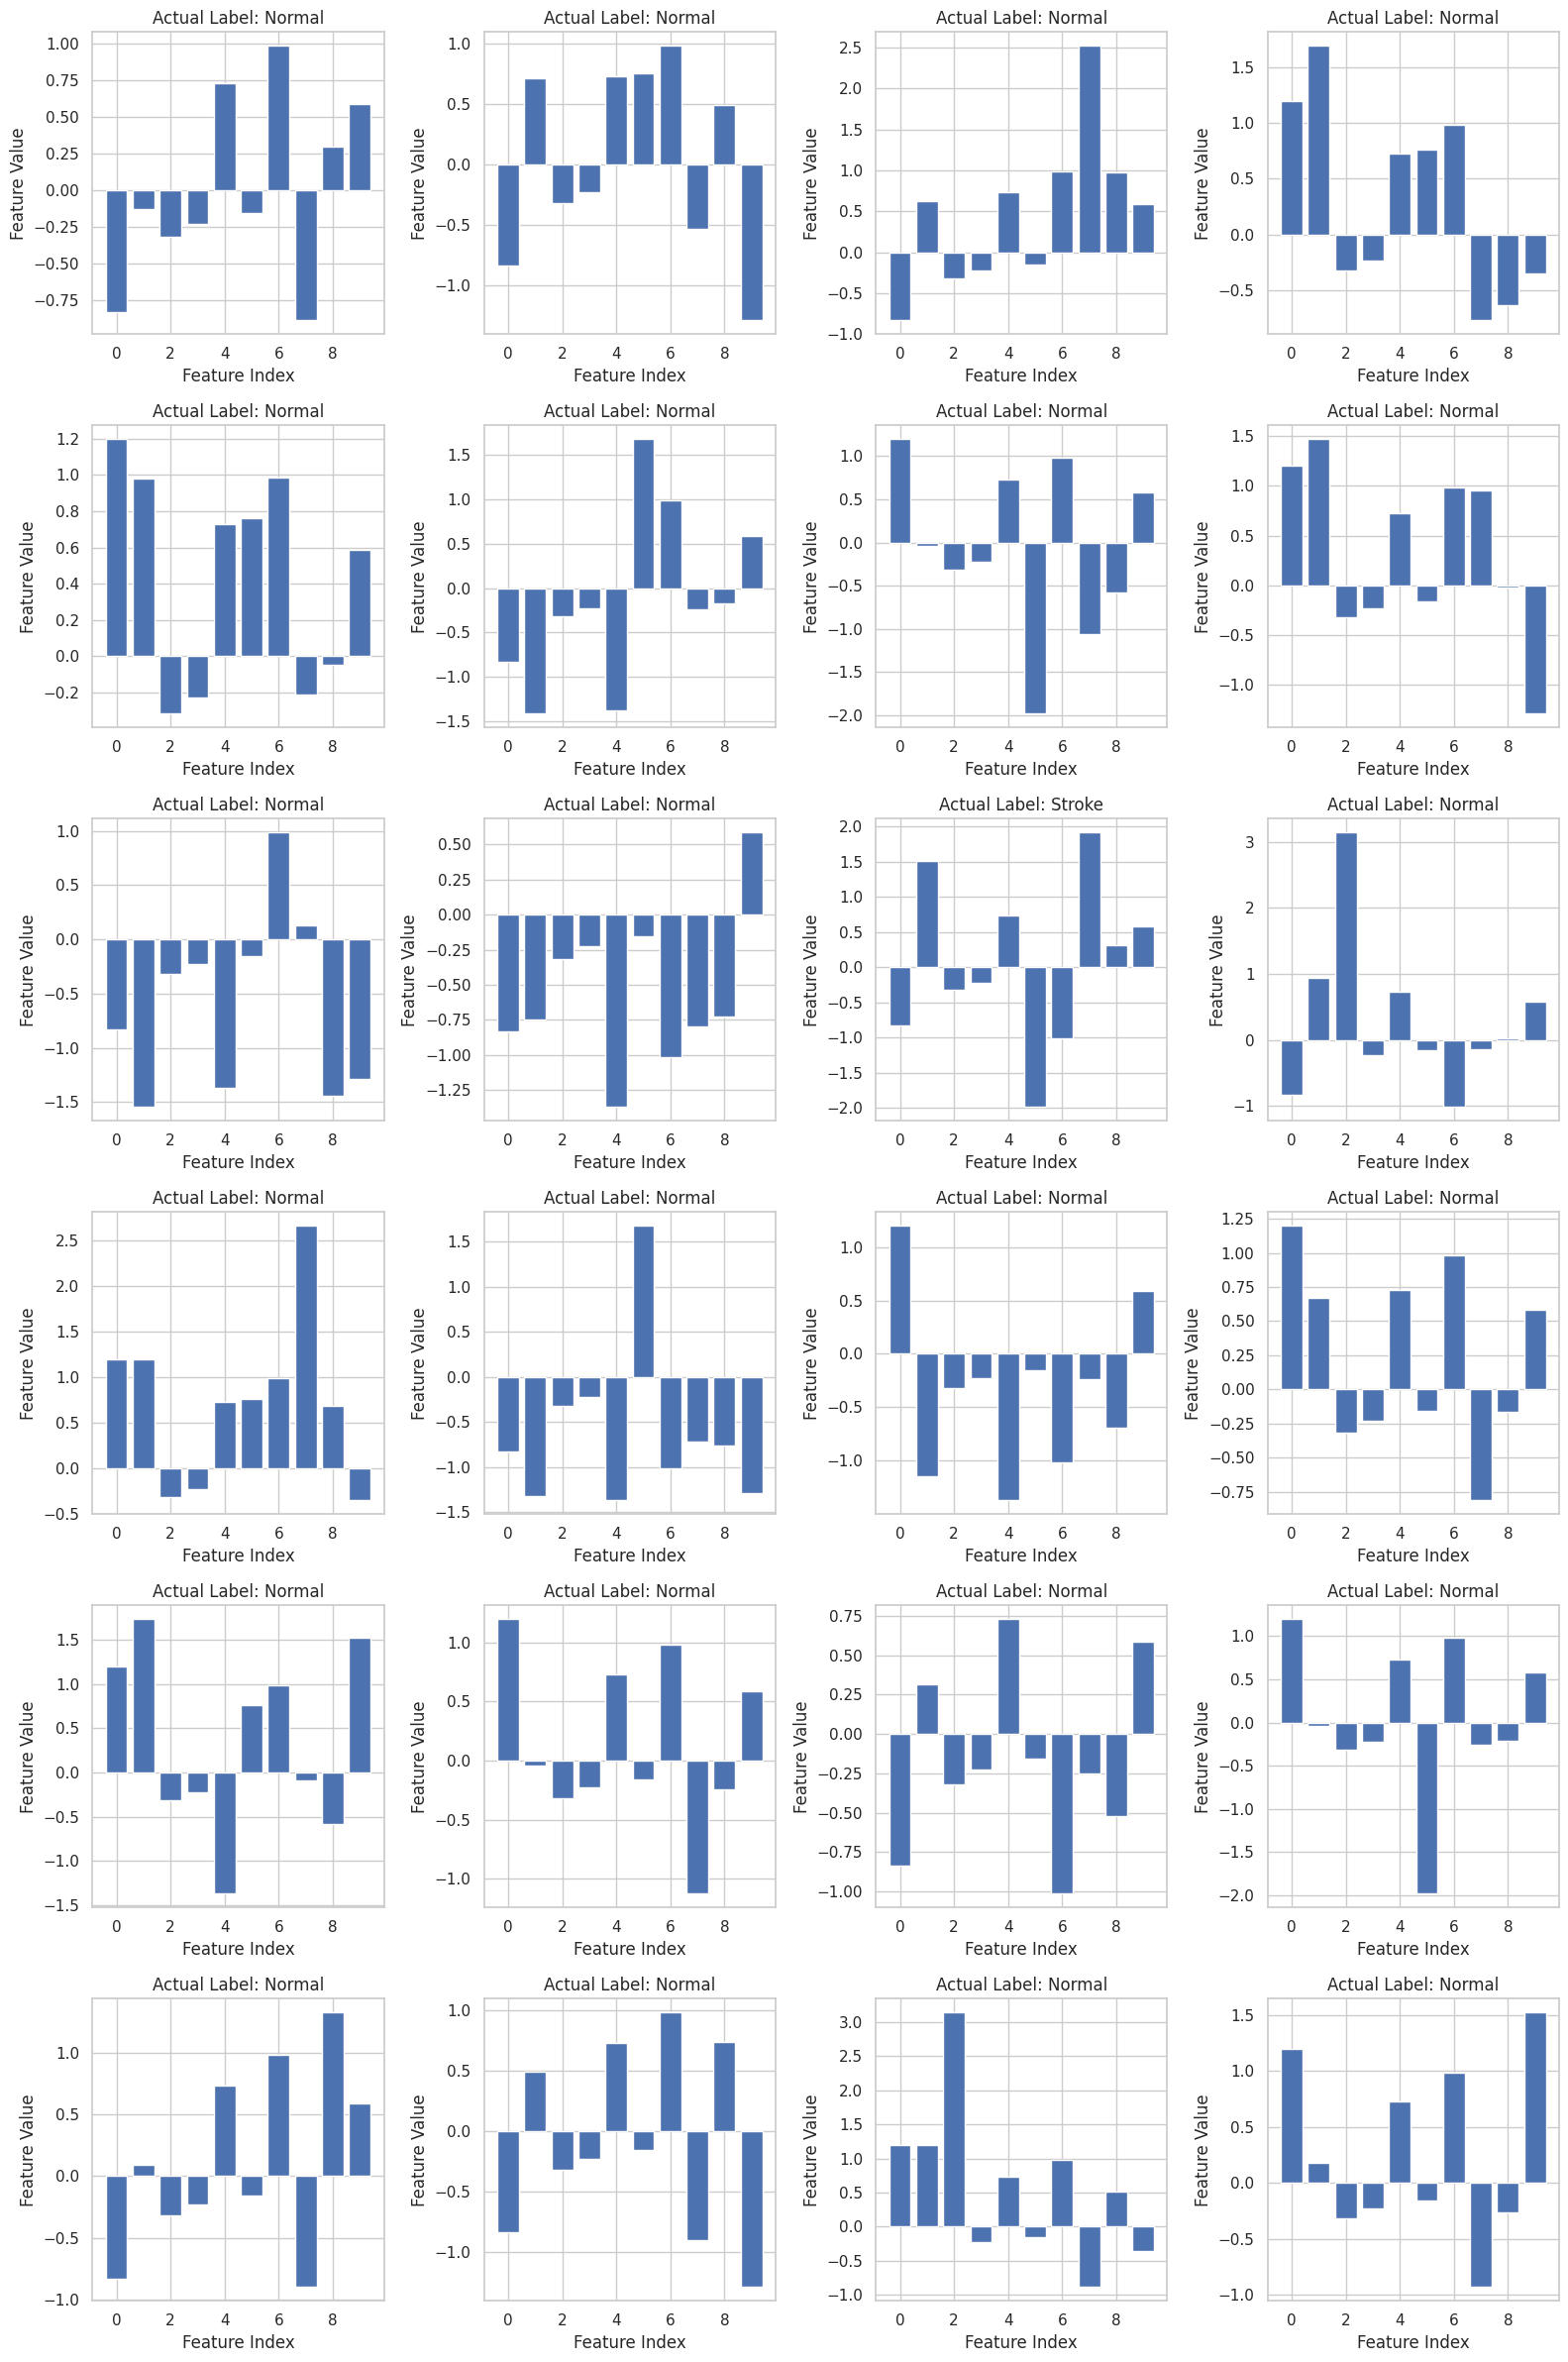

In [39]:
import numpy as np
import matplotlib.pyplot as plt

# Assuming y_train is a pandas Series; convert to NumPy array
y_train_array = y_train.to_numpy()  # Convert y_train to a NumPy array

plt.figure(figsize=(16, 24))
for i in range(24):
    plt.subplot(6, 4, i + 1)
    plt.bar(range(len(X_train[i])), X_train[i])  # Use bar plot to visualize features
    plt.title(f"Actual Label: {class_labels[y_train_array[i]]}")  # Access using the NumPy array
    plt.xlabel("Feature Index")
    plt.ylabel("Feature Value")
plt.tight_layout()
plt.show()

In [41]:
from PIL import Image
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Input, Dense,Conv2D , MaxPooling2D, Flatten,BatchNormalization,Dropout
from tensorflow.keras.preprocessing import image_dataset_from_directory
import tensorflow_hub as hub

In [42]:
model = Sequential()

model.add(Conv2D(filters=100,kernel_size=(3,3),strides=(1,1),padding="valid",activation="relu", input_shape=(224,224,3)))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(filters=80,kernel_size=(3,3),strides=(1,1),padding="valid",activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Conv2D(filters=64,kernel_size=(3,3),strides=(1,1),padding="valid",activation="relu"))
model.add(MaxPooling2D(pool_size=(2,2)))

model.add(Flatten())
model.add(Dense(units=500, activation="relu"))
model.add(Dropout(0.2))
model.add(Dense(units=500, activation="relu"))
model.add(Dropout(0.2))
model.add(Dense(units=1, activation="sigmoid"))

model.compile(optimizer="adam",loss="binary_crossentropy",
             metrics=["accuracy"])

model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 222, 222, 100)       │           2,800 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 111, 111, 100)       │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 109, 109, 80)        │          72,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 54, 54, 80)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 52, 52, 64)          │          46,144 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 26, 26, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 43264)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 500)                 │      21,632,500 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 500)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 500)                 │         250,500 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 500)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 1)                   │             501 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 22,004,525 (83.94 MB)

 Trainable params: 22,004,525 (83.94 MB)

 Non-trainable params: 0 (0.00 B)

In [46]:
from keras.models import Sequential
from keras.layers import Dense

# Define a feedforward neural network model
model = Sequential()
model.add(Dense(64, activation='relu', input_shape=(10,)))  # Adjust input_shape to the number of features
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='sigmoid'))  # Use 'sigmoid' for binary classification (e.g., stroke prediction)

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Fit the model
history = model.fit(X_train, y_train, batch_size=32, epochs=10, validation_data=(X_test, y_test))

Epoch 1/10
123/123 ━━━━━━━━━━━━━━━━━━━━ 4s 12ms/step - accuracy: 0.8958 - loss: 0.3752 - val_accuracy: 0.9460 - val_loss: 0.1821
Epoch 2/10
123/123 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9650 - loss: 0.1335 - val_accuracy: 0.9460 - val_loss: 0.1758
Epoch 3/10
123/123 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.9599 - loss: 0.1386 - val_accuracy: 0.9460 - val_loss: 0.1733
Epoch 4/10
123/123 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9555 - loss: 0.1429 - val_accuracy: 0.9460 - val_loss: 0.1715
Epoch 5/10
123/123 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9581 - loss: 0.1396 - val_accuracy: 0.9460 - val_loss: 0.1771
Epoch 6/10
123/123 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9586 - loss: 0.1356 - val_accuracy: 0.9460 - val_loss: 0.1778
Epoch 7/10
123/123 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9604 - loss: 0.1247 - val_accuracy: 0.9460 - val_loss: 0.1727
Epoch 8/10
123/123 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9568 - loss: 0.1326 - val_accuracy: 0

In [48]:
loss, acc = model.evaluate(X_test,y_test)
print("Loss on Test Data:",loss)
print("Accuracy on Test Data:",acc)

loss, acc = model.evaluate(X_train,y_train)
print("Loss on Train Data:",loss)
print("Accuracy on Train Data:",acc)

31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.9467 - loss: 0.1718
Loss on Test Data: 0.17089411616325378
Accuracy on Test Data: 0.9460285305976868
123/123 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9614 - loss: 0.1154
Loss on Train Data: 0.12324600666761398
Accuracy on Train Data: 0.9605296850204468


In [50]:
y_pred_test = model.predict(X_test)
y_pred_test_label = [1 if i>=0.5 else 0 for i in y_pred_test]

31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step


In [51]:
print("Actual Label:",y_test[:10])
print("Predicted Label:",y_pred_test_label[:10])

Actual Label: 4336    0
3709    0
964     0
2647    0
3262    0
1279    0
2113    0
3236    0
3983    0
3544    0
Name: stroke, dtype: int64
Predicted Label: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


In [53]:
# Import necessary libraries
from sklearn.metrics import confusion_matrix, classification_report

# Your existing code for printing metrics evaluation
print("-----Metrics Evaluation On Test Data -----")
print()
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_test_label))
print()
print("Classification Report:\n", classification_report(y_test, y_pred_test_label))

-----Metrics Evaluation On Test Data -----

Confusion Matrix:
 [[929   0]
 [ 53   0]]

Classification Report:
               precision    recall  f1-score   support

           0       0.95      1.00      0.97       929
           1       0.00      0.00      0.00        53

    accuracy                           0.95       982
   macro avg       0.47      0.50      0.49       982
weighted avg       0.89      0.95      0.92       982



In [55]:
from sklearn.metrics import roc_curve, precision_recall_curve, auc

y_prob = model.predict(X_test)

fpr, tpr, threshold = roc_curve(y_test, y_prob)

# Compute ROC curve and ROC area
roc_auc = auc(fpr, tpr)
print(f"ROC - Area :{roc_auc}")

31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
ROC - Area :0.8371752950017263


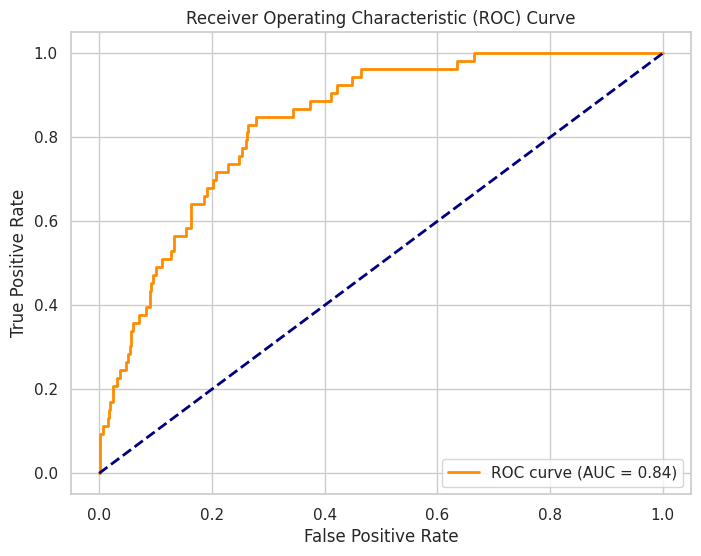

In [56]:
# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

In [58]:
y_prob = model.predict(X_test)

precision, recall, threshold = precision_recall_curve(y_test, y_prob)

# Compute ROC curve and ROC area
pr_auc = auc(recall,precision)
print(f"PR - Area :{pr_auc}")

31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
PR - Area :0.2305650230783453


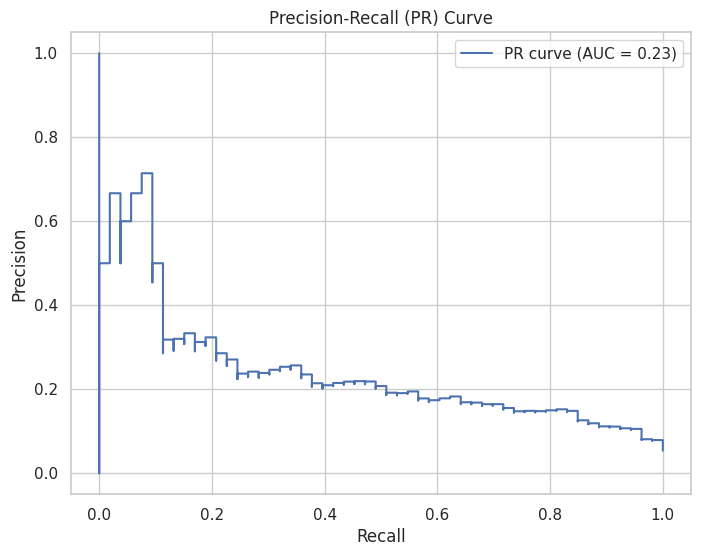

In [59]:
# Plot Precision-Recall curve
plt.figure(figsize=(8, 6))
plt.step(recall, precision, color='b', where='post', label=f'PR curve (AUC = {pr_auc:.2f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall (PR) Curve')
plt.legend(loc='upper right')
plt.show()

In [62]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)
acc_rf = accuracy_score(y_test, y_pred_rf)
model_accuracies['Random Forest'] = acc_rf
print("\nRandom Forest Accuracy:", acc_rf)
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))


Random Forest Accuracy: 0.9460285132382892
Confusion Matrix:
 [[929   0]
 [ 53   0]]


In [24]:
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)
acc_dt = accuracy_score(y_test, y_pred_dt)
model_accuracies['Decision Tree'] = acc_dt
print("\nDecision Tree Accuracy:", acc_dt)
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_dt))


Decision Tree Accuracy: 0.9236252545824847
Confusion Matrix:
 [[900  29]
 [ 46   7]]


In [25]:
lr = LogisticRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)
acc_lr = accuracy_score(y_test, y_pred_lr)
model_accuracies['Logistic Regression'] = acc_lr
print("\nLogistic Regression Accuracy:", acc_lr)
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_lr))


Logistic Regression Accuracy: 0.9460285132382892
Confusion Matrix:
 [[929   0]
 [ 53   0]]


In [26]:
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)
acc_knn = accuracy_score(y_test, y_pred_knn)
model_accuracies['K-Nearest Neighbors'] = acc_knn
print("\nK-Nearest Neighbors Accuracy:", acc_knn)
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_knn))


K-Nearest Neighbors Accuracy: 0.9429735234215886
Confusion Matrix:
 [[926   3]
 [ 53   0]]


In [27]:
svm = SVC()
svm.fit(X_train, y_train)
y_pred_svm = svm.predict(X_test)
acc_svm = accuracy_score(y_test, y_pred_svm)
model_accuracies['Support Vector Machine'] = acc_svm
print("\nSupport Vector Machine Accuracy:", acc_svm)
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_svm))


Support Vector Machine Accuracy: 0.9460285132382892
Confusion Matrix:
 [[929   0]
 [ 53   0]]


In [28]:
xgb = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')
xgb.fit(X_train, y_train)
y_pred_xgb = xgb.predict(X_test)
acc_xgb = accuracy_score(y_test, y_pred_xgb)
model_accuracies['XGBoost'] = acc_xgb
print("\nXGBoost Accuracy:", acc_xgb)
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_xgb))


XGBoost Accuracy: 0.9429735234215886
Confusion Matrix:
 [[926   3]
 [ 53   0]]


In [29]:
cnn = Sequential()
cnn.add(Dense(64, activation='relu', input_shape=(X_train.shape[1],)))
cnn.add(Dropout(0.3))
cnn.add(Dense(32, activation='relu'))
cnn.add(Dense(1, activation='sigmoid'))
cnn.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
cnn.fit(X_train, y_train, epochs=10, batch_size=32, verbose=0)
cnn_loss, acc_cnn = cnn.evaluate(X_test, y_test, verbose=0)
model_accuracies['CNN'] = acc_cnn
print("\nCNN Accuracy:", acc_cnn)


CNN Accuracy: 0.9460285305976868


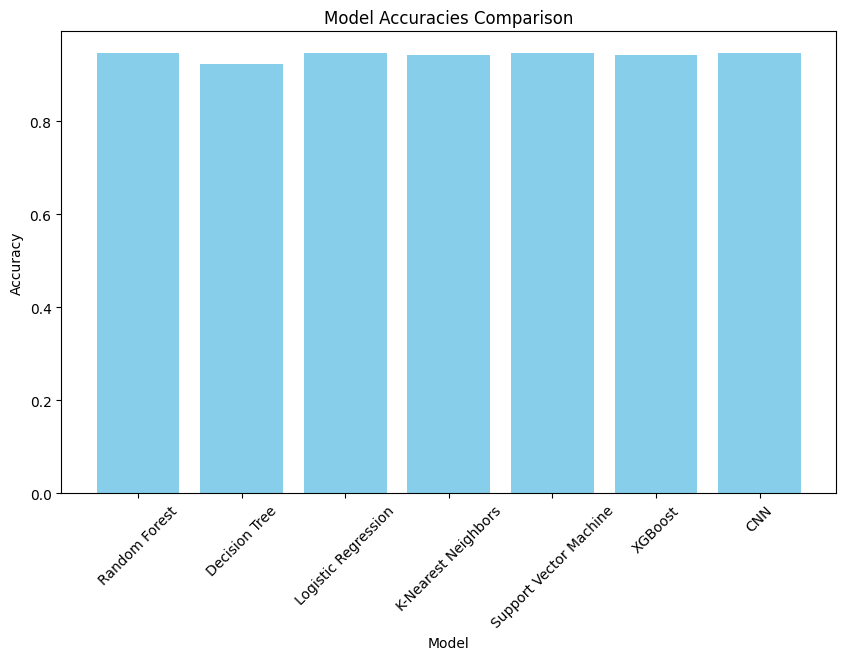

In [30]:
plt.figure(figsize=(10, 6))
plt.bar(model_accuracies.keys(), model_accuracies.values(), color='skyblue')
plt.xlabel("Model")
plt.ylabel("Accuracy")
plt.title("Model Accuracies Comparison")
plt.xticks(rotation=45)
plt.show()

In [31]:
best_model = max(model_accuracies, key=model_accuracies.get)
print(f"\nThe model with the highest accuracy is: {best_model} with accuracy {model_accuracies[best_model]:.2f}")


The model with the highest accuracy is: CNN with accuracy 0.95
